# Overview

**Title:** Text Classification; NLP with Corona Virus Tweets.
 
**Background:**
NLP with Corona Virus Tweet refers to the application of Natural Language Processing (NLP) techniques and methodologies to analyze and extract valuable insights from tweets related to the Coronavirus (COVID-19) pandemic. With the widespread use of social media platforms like Twitter, millions of users share their thoughts, opinions, and experiences regarding the ongoing pandemic.

NLP techniques enable us to process and understand the textual content of these tweets, allowing us to extract meaningful information, sentiment analysis, topic modeling, and other valuable insights. The analysis of Corona Virus tweets using NLP can provide various benefits, including:

Sentiment Analysis: NLP techniques can be employed to determine the sentiment or emotional tone expressed in tweets related to the pandemic. By analyzing the sentiment, we can understand public opinion, detect trends, and identify areas where people might be experiencing negative sentiments or anxiety.

Topic Modeling: NLP algorithms can be applied to identify topics and themes present in Corona Virus tweets. This allows us to categorize tweets into different topics such as symptoms, prevention measures, vaccination, social impact, and more. Topic modeling helps in understanding the key concerns, issues, and discussions surrounding the pandemic.

Information Extraction: NLP techniques can assist in extracting specific information from tweets, such as the number of cases, locations, affected populations, or relevant events. This information can be used for tracking the spread of the virus, identifying hotspots, and providing real-time updates to the public.

Trend Analysis: By analyzing large volumes of Corona Virus tweets, NLP can help identify emerging trends, popular hashtags, influential users, and viral content. This information can be valuable for public health organizations, policymakers, and researchers to understand public engagement, disseminate accurate information, and monitor the impact of their interventions.

Fake News Detection: NLP algorithms can be utilized to detect misinformation and fake news related to the Coronavirus. By analyzing the language patterns, sources, and credibility of the tweets, NLP models can help flag potentially misleading or harmful information, contributing to efforts in curbing the spread of misinformation.

Overall, NLP with Corona Virus Tweet enables us to leverage the power of language processing techniques to gain insights, monitor public sentiment, track the spread of the virus, and combat misinformation during these challenging times. By combining NLP with other data analysis approaches, it can provide a comprehensive understanding of the social, psychological, and informational aspects of the pandemic.

**Dataset Source:**[🔎](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification?select=Corona_NLP_test.csv)

# Objectives

My objective is to train a model that will able to classify corona virus tweets based on its severity

# Order
* Libraries import
* Preprocessing Function Setup
* Loading and Reading of Dataset
* Applying of preprocessing functions
* Vectorization
* Splitting of Dataset
* Dimentionality reduction
* Visualization
* Model Build and Testing

# Libraries Import

In [1]:
import numpy as np  # Import the NumPy library for numerical computations
import pandas as pd  # Import the Pandas library for data processing and CSV file I/O
import nltk  # Import the NLTK library for natural language processing
import string  # Import the string module for string operations
import re  # Import the re module for regular expressions
import os  # Import the os module for operating system related operations
from nltk.stem import WordNetLemmatizer  # Import the WordNetLemmatizer from NLTK for word lemmatization
import matplotlib as mpl  # Import the matplotlib library for data visualization
import matplotlib.pyplot as plt  # Import the pyplot module from matplotlib for plotting
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Import CountVectorizer and TfidfVectorizer for text feature extraction
from sklearn.svm import SVC  # Import the SVC (Support Vector Classifier) from scikit-learn for Support Vector Machine algorithm
from sklearn.model_selection import train_test_split, GridSearchCV  # Import train_test_split and GridSearchCV for data splitting and hyperparameter tuning
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Import StandardScaler and MinMaxScaler for data scaling
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier  # Import various ensemble classifiers from scikit-learn
from xgboost import XGBClassifier  # Import XGBClassifier from XGBoost for gradient boosting
from sklearn.neural_network import MLPClassifier  # Import MLPClassifier from scikit-learn for Multi-Layer Perceptron algorithm
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression  # Import various linear classifiers from scikit-learn
import seaborn as sns  # Import seaborn for advanced visualization
from sklearn.metrics import classification_report, confusion_matrix  # Import classification_report and confusion_matrix for model evaluation
from sklearn.naive_bayes import MultinomialNB  # Import MultinomialNB from scikit-learn for Naive Bayes algorithm
import sklearn.decomposition as sk_decomp  # Import the sklearn.decomposition module
from plotly.offline import init_notebook_mode, iplot # Import the iplot module for interactive visualization
import plotly.express as px # Import the plotly.express for interactive visualization
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

#Initializing notebook for interactive visualization
init_notebook_mode(connected=True)

#Setting a default width and height for plotting images
mpl.rcParams['figure.figsize'] = 10, 7

import warnings
warnings.filterwarnings('ignore')

# Preprocessing Functions

In [2]:
#Fetching the nltk stopwords for English language and assigning it to a variable
stop=nltk.corpus.stopwords.words('english')

#Function for the removal punctuations from target feature and lowercasing the result
def remove_punc(x):
    return ''.join([i for i in x if i not in string.punctuation]).lower()

#Function for Word tokenization using regex 
def wt_lc(x):
    tokens = re.split('\W+',x)
    return tokens

#Function for Word Lemma tokenization
lemma=WordNetLemmatizer()
def remove_stop(x):
    return ' '.join([lemma.lemmatize(i) for i in x if i not in stop])

#Function for Encoding
def change(x) :
    dic={'Positive':2, 'Neutral':1, 'Extremely Positive':2, 'Extremely Negative':0,
       'Negative':0}
    return dic[x]

# Loading & Reading of Datasets

In [3]:
data_train=pd.read_csv('C:/Users/Praise Ebo/Downloads/NLP Corona Virus/Corona_NLP_train.csv',encoding='latin-1')
data_test=pd.read_csv('C:/Users/Praise Ebo/Downloads/NLP Corona Virus/Corona_NLP_test.csv',encoding='latin-1')

data_train.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
#Concatenating the two data frames vertically to have a single data frame
dt =pd.concat([data_train,data_test])

#Shuffling of rows randomly to avoid biases
dt=dt.sample(len(dt))

#Reducing dataframe to capture the needed features for processing
dt=dt[['OriginalTweet','Sentiment']]

<AxesSubplot:>

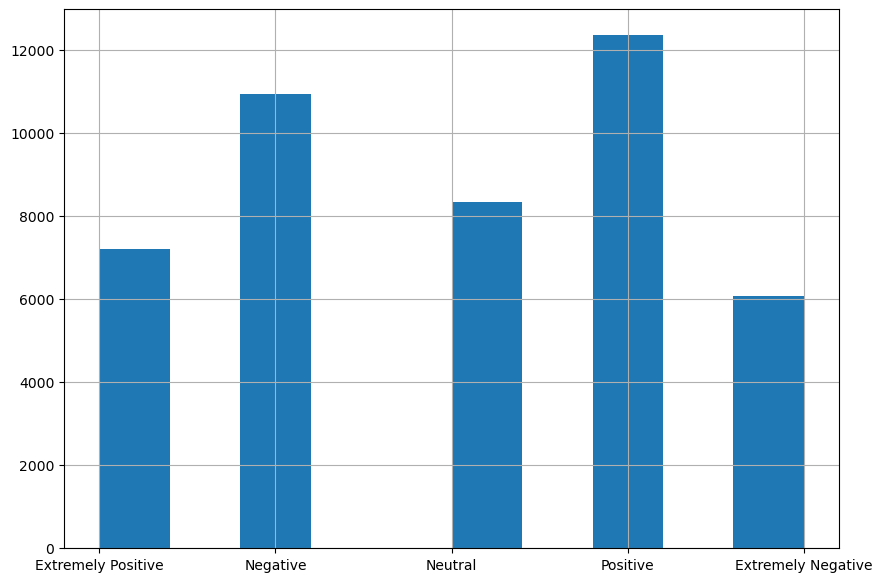

In [5]:
dt['Sentiment'].hist()

# Applying Preprocessing Functions

In [6]:
dt['OriginalTweet']=dt['OriginalTweet'].apply(lambda x:remove_punc(x))
dt['OriginalTweet']=dt['OriginalTweet'].apply(lambda x:wt_lc(x))
dt['OriginalTweet']=dt['OriginalTweet'].apply(lambda x:remove_stop(x))
dt['text']=dt['Sentiment']
dt['Sentiment']=dt['Sentiment'].apply(lambda x:change(x))


# Vectorization

In [7]:
tf_tranform=TfidfVectorizer()
x_tf=tf_tranform.fit_transform(dt['OriginalTweet'])
count_tranform=CountVectorizer()
x_count=count_tranform.fit_transform(dt['OriginalTweet'])

# Splitting Of Dataset

In [8]:
X_train,X_test,y_train,y_test =train_test_split(x_count,dt['Sentiment'],test_size=0.2, random_state=42)

# Dimensionality Reduction

In [9]:
pca=PCA(n_components=3)
pca.fit(x_count[:5000].toarray())

pca_pred=pca.transform(x_count[:100].toarray())

# Visualization

In [28]:
df = pd.DataFrame({'sepal_length':pca_pred[:,0],'sepal_width':pca_pred[:,1],'petal_width':pca_pred[:,2],'color':dt.iloc[:100,1]*60,'text':dt.iloc[:100,2]})
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
             color='color',text='text')
fig.update_traces(textfont=dict(
    size=7
))
fig.show()

# Model Building and Testing

Training SVM...
Best parameters for SVM: {'C': 10}
Accuracy for SVM: 0.8009120231342454

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      3406
           1       0.74      0.68      0.71      1651
           2       0.82      0.85      0.84      3934

    accuracy                           0.80      8991
   macro avg       0.79      0.78      0.78      8991
weighted avg       0.80      0.80      0.80      8991

Training Random Forest...
Best parameters for Random Forest: {'n_estimators': 300}
Accuracy for Random Forest: 0.765209654098543

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      3406
           1       0.69      0.69      0.69      1651
           2       0.77      0.83      0.80      3934

    accuracy                           0.77      8991
   macro avg       0.75      0.75      0.75      8991
weighted avg       0.77      0.77      0.76      8991

Training AdaBoost..

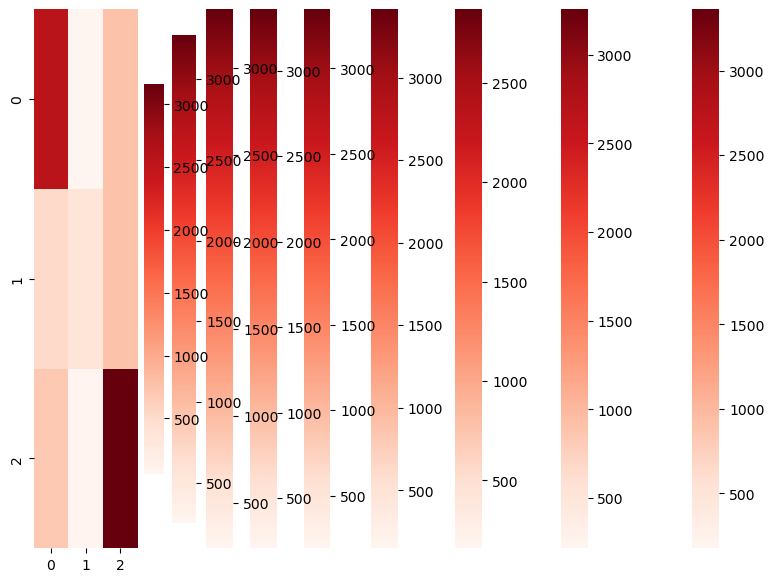

In [11]:
# Defining classifiers and their respective parameter grids
classifiers = [
    ('SVM', SVC(), {'C': [1, 10, 100]}),
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [100, 200, 300]}),
    ('AdaBoost', AdaBoostClassifier(), {'n_estimators': [50, 100, 150]}),
    ('Extra Trees', ExtraTreesClassifier(), {'n_estimators': [100, 200, 300]}),
    ('Ridge', RidgeClassifier(), {'alpha': [0.1, 1, 10]}),
    ('SGD', SGDClassifier(), {'alpha': [0.0001, 0.001, 0.01]}),
    ('Logistic Regression', LogisticRegression(), {'C': [0.1, 1, 10]}),
    ('MLP', MLPClassifier(), {'hidden_layer_sizes': [(50,), (100,), (200,)]}),
    ('Naive Bayes', MultinomialNB(), {}),
]

# Grid search and model evaluation
for name, clf, param_grid in classifiers:
    print(f"Training {name}...")

    grid_search = GridSearchCV(clf, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Accuracy for {name}: {accuracy}\n")
    print(classification_report(y_test, y_pred))
    matrix=confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix,cmap='Reds') 

**From the above GridSearchCV, we can see that the Stochastic Gradient Descent Classifier(SDGClassifier) performed the best on the test data with an accuracy score of 81.7% with the best parameter as alpha : 0.0001. Hence SDGClassifier is the best model for this project.**